In [1]:
# import libraries

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [3]:
# get data of Apple (AAPL) stocks

apple = yf.Ticker("AAPL")

In [5]:
# Apple stock data from the begining 

apple = apple.history(period="max")

In [7]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,0.0,0.0
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,0.0,0.0
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,0.0,0.0


<Figure size 1000x800 with 0 Axes>

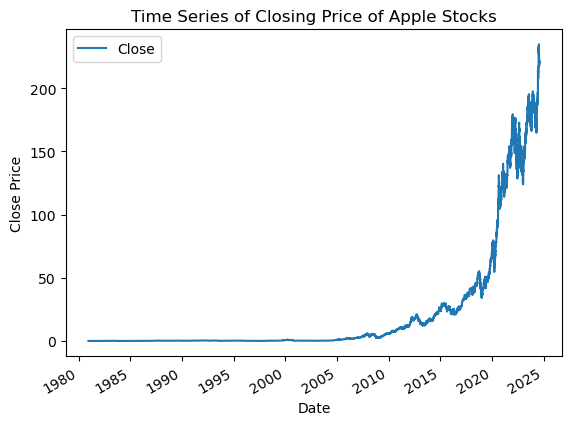

In [9]:
# plot a graph of 'Close' againest index

plt.figure(figsize=(10,8))
apple.plot(kind='line', y="Close", use_index=True)
plt.title('Time Series of Closing Price of Apple Stocks')
plt.ylabel('Close Price')
plt.show()

In [11]:
# remove 'Dividends' and 'Stock Splits' columns

apple = apple.drop(columns=["Dividends", "Stock Splits"])

In [13]:
apple

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600
...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800


In [15]:
# apple["Tomorrow"] presents tomorrow's stock price

apple["Tomorrow"] = apple["Close"].shift(-1)

In [17]:
apple

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.093890
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.086999
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.089152
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.091737
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.097335
...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,218.240005
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,218.800003
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,222.080002


In [19]:
# If tomorrow's price is greater than today's price, Target will be 1, otherwise 0

apple["Target"] = (apple["Tomorrow"] > apple["Close"]).astype(int)

In [21]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.093890,0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.086999,0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.089152,1
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.091737,1
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.097335,1
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,218.240005,1
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,218.800003,1
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,222.080002,1


In [23]:
# use a RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# since this is a time series, we split the data using date

train = apple.iloc[:-90]
test = apple.iloc[-90:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) 

RandomForestClassifier(min_samples_split=100, random_state=1)

In [25]:
# Use precision_score to find how accurate our model is

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4782608695652174

In [27]:
combined = pd.concat([test["Target"], preds], axis=1)

<Figure size 1000x800 with 0 Axes>

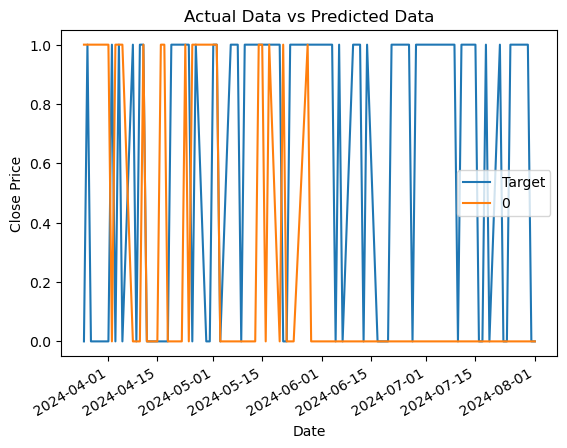

In [29]:
plt.figure(figsize=(10,8))
combined.plot(kind='line', use_index=True)
plt.title('Actual Data vs Predicted Data')
plt.ylabel('Close Price')
plt.show()

'Target' is the Actual Data and '0' is the Predicted Data

In [31]:
test["Target"].value_counts()

Target
1    56
0    34
Name: count, dtype: int64

In [33]:
preds.value_counts()

0    67
1    23
Name: count, dtype: int64